# Exercici 1
## Realitza web scraping de dues de les tres pàgines web proposades utilitzant BeautifulSoup primer i Selenium després. 

- http://quotes.toscrape.com

- https://www.bolsamadrid.es

- www.wikipedia.es (fes alguna cerca primer i escrapeja algun contingut)

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


### a) http://quotes.toscrape.com

1) Indentificamos los objetos que continen la información que queremos obtener, en la página web :

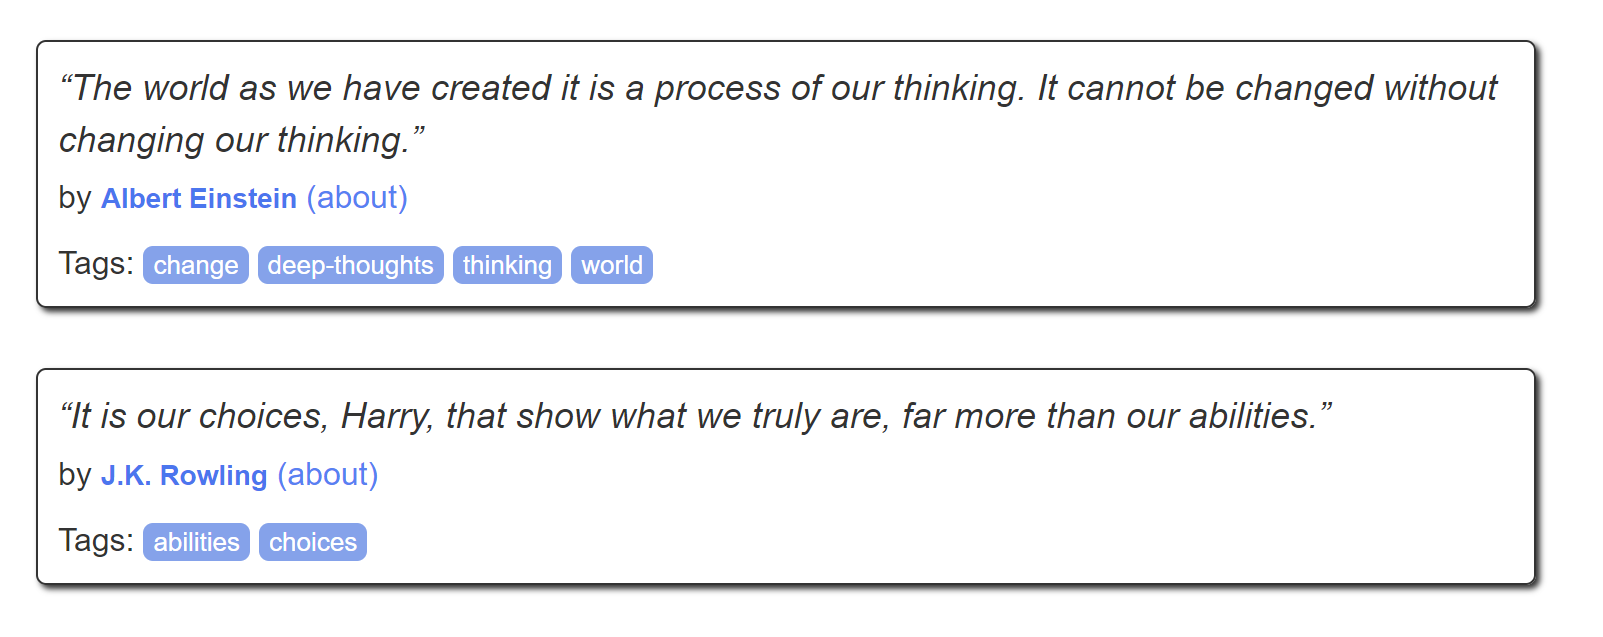

<small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>

**Quiero extraer los autores.**

**1)** Descargamos el contendio en html de la web a nuestro entorno Python:

In [2]:
import requests

In [4]:
# Este código realiza una solicitud HTTP GET a la URL proporcionada.
# Recupera los datos HTML que el servidor devuelve y almacena esos datos en un objeto de Python.
URL = "http://quotes.toscrape.com"
page = requests.get(URL)
print(page.text)

<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
</head>
<body>
    <div class="container">
        <div class="row header-box">
            <div class="col-md-8">
                <h1>
                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>
                </h1>
            </div>
            <div class="col-md-4">
                <p>
                
                    <a href="/login">Login</a>
                
                </p>
            </div>
        </div>
    

<div class="row">
    <div class="col-md-8">

    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">
        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
        <span>by <small class="author" itempr

**2)** Creamos la "sopa", es decir, el arbol de objetos Python que representa al documento HTML, con Beautiful Soup:

In [6]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [7]:
from bs4 import BeautifulSoup

# el parametro page.content se pasa a bs para analizar la pagina.
# el analizador html.parser se utiliza como analizador html para bs.
soup = BeautifulSoup(page.content, "html.parser") # si fuera xml, haríamos pi instal lxml, y aqui sería "lxml"

**3)** Buscar los elementos en la "sopa" (el arbol de objetos) y obtener la información deseada:

Empezaré solo buscando los autores:

In [15]:
# busco todos los elementos "small" que tienen el atributo clase: "author"
autores = soup.find_all("small", class_ = "author") # pongo class_ porque es una palabra reservada y no se peude usar directamente como un parametro. POngo el guion bajo class_que es una convencion de BeatufulSoup para referirse a la clase CSS.
# Recorro los elementos de "autores" y obtengo el texto del autor
for author in autores:
    author_name = author.text
    print(author_name)


Albert Einstein
J.K. Rowling
Albert Einstein
Jane Austen
Marilyn Monroe
Albert Einstein
André Gide
Thomas A. Edison
Eleanor Roosevelt
Steve Martin


**Voy a buscar la frase y el autor y los tags:**

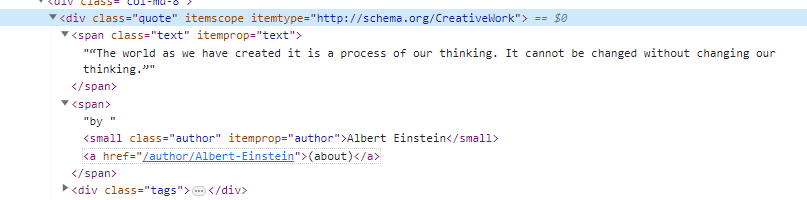

In [31]:
quotes = soup.find_all("div", class_ = "quote")
for quote in quotes:
    cita = quote.find("span", class_="text")
    Autor = quote.find("small", class_="author")
    Tags = quote.find("div", class_="tags")
    print(cita.text.strip())   # añado .text para que solo coja textos de el elemento Bs
    print(Autor.text.strip())  # añado strip)= apra  eliminar los espacios antes y despues del texto
    print(Tags.text.strip())
    print()

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Albert Einstein
Tags:
            
change
deep-thoughts
thinking
world

“It is our choices, Harry, that show what we truly are, far more than our abilities.”
J.K. Rowling
Tags:
            
abilities
choices

“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Albert Einstein
Tags:
            
inspirational
life
live
miracle
miracles

“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Jane Austen
Tags:
            
aliteracy
books
classic
humor

“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Marilyn Monroe
Tags:
            
be-yourself
inspirational

“Try not to become a man of success. Rather become a man of value.”
Albert Einstein
Tags:
            
adulthood
success
value

### b) https://www.bolsamadrid.es

Objetivo: INdicar la feha y hora de extracción, y extraer los datos de las accciones del Ibex 35 de la tabla de la pagina web:
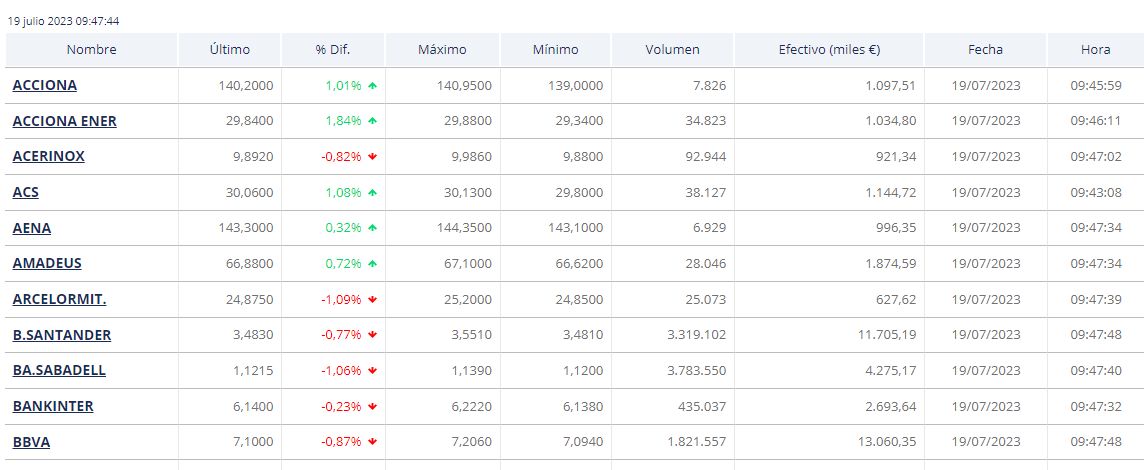

Voy a usar lxml que ess mas rapido y eficiente manejando xml y html, que html.parser que solo maneja html, aunque este último es mas liviano y viene incorporado en Python.

In [68]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [74]:
import requests
URL = "https://www.bolsasymercados.es/bme-exchange/es/Mercados-y-Cotizaciones/Acciones/Mercado-Continuo/Precios/ibex-35-ES0SI0000005"
page = requests.get(URL).text  #me devuelve el contenido html en formato texto
soup = BeautifulSoup(page, "lxml")

In [80]:
head = soup.find("head")
hora_actualizacion = head.get("data-hora-act")
print(hora_actualizacion)

Wed, 19 Jul 2023 17:47:26 GMT


Encontramos la tabla:

In [84]:
tabla = soup.find('table', {'class': 'shares-table'})  #encuentro la tabla utilizando su clase CSS
filas = tabla.find_all('tr')[1:]  # voy a buscar todas las filas, excluyendo la primera que es el envabezado

#voy a ir extrayendo el valor de cada columna por filas
for fila in filas:   
    celdas = fila.find_all("td")  #copio todas las celdas de cada fila
    # y extraigo el valor de cada celda
    nombre = celdas[0].text.strip()
    ultimo = celdas[1].text.strip()
    dif = celdas[2].text.strip()
    maximo = celdas[3].text.strip()
    minimo = celdas[4].text.strip()
    volumen = celdas[5].text.strip()
    efectivo = celdas[6].text.strip()
    fecha = celdas[7].text.strip()
    hora = celdas[8].text.strip()

    #imprimo la secuencia por cada valor bursatil
    print("Nombre:", nombre)
    print("Último:", ultimo)
    print("% Dif.:", dif)
    print("Máximo:", maximo)
    print("Mínimo:", minimo)
    print("Volumen:", volumen)
    print("Efectivo (miles €):", efectivo)
    print("Fecha:", fecha)
    print("Hora:", hora)
    print()

AttributeError: 'NoneType' object has no attribute 'find_all'

In [72]:
# Crear una lista vacía para almacenar los datos de la tabla
datos_tabla = []

# Obtener las filas de la tabla
filas = tabla.find_all('tr')

# Iterar sobre las filas y obtener los valores de cada celda
for fila in filas:
    # Obtener las celdas de la fila
    celdas = fila.find_all('td')
    
    # Obtener los valores de las celdas y agregarlos a la lista de datos
    valores = [celda.get_text(strip=True) for celda in celdas]
    datos_tabla.append(valores)

# Crear un DataFrame de pandas con los datos
df = pd.DataFrame(datos_tabla[1:], columns=datos_tabla[0])

# Imprimir el DataFrame
print(df)

AttributeError: 'NoneType' object has no attribute 'find_all'

# Exercici 2
## Documenta en un Word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.

! Per saber més

A manera d'exemple del que es demana pots consultar aquest enllaç:

->https://www.kaggle.com/datasets/vivovinco/20212022-football-team-stats.

# Exercici 3
## Tria una pàgina web que tu vulguis i realitza web scraping mitjançant la llibreria Selenium primer i Scrapy després. 